In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

C:\Users\jarvi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## PART 1 : Prepare the Data 

In [3]:
# 1. Read in the data
df=pd.read_csv('Resources/myopia.csv')
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# 2. Remove the "MYOPIC" column from the dataset.
labels = df["MYOPIC"]
df.drop("MYOPIC", axis=1).head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# 3. Standarize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
scaler = StandardScaler()
myoScaled = scaler.fit_transform(df)

In [6]:
## APPLY DIMESIONALITY REDUCTION

In [8]:
# 1.Perform dimensionality reduction with PCA. How did the number of the features change?
pca = PCA(n_components=0.90)
myoPca = pca.fit_transform(myoScaled)

# PCA converted to dataframe
df_myo_pca = pd.DataFrame(myoPca)

# print sum of explained variance ratio
pca.explained_variance_ratio_.sum()

0.9289880687733467

In [9]:
# 2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
# Run t - SNE model 
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_myo_pca)

# shape t - SNE model
tsne_features.shape


(618, 2)

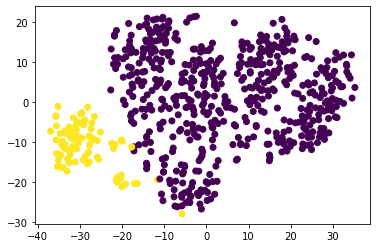

In [10]:
# plot t - SNE output
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)
plt.show()

In [ ]:
## Part 3: Perform a Cluster Analysis with K-means